# Tarea 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    
    def __init__(self, learning_rate=0.01):
        
        self.learning_rate = learning_rate
        self._updates = 0

    def fit(self, data, labels):
        """
        data:   data points xi in Rd, i=1,...,N
        labels: labels for data points, in {-1, 1}.
        """
        
        N, d    = data.shape
        self.w  = np.zeros(d+1)
        X       = np.zeros((N, d+1))
        
        X[:,0], X[:,1:] = 1, data
        
        for k, x in enumerate(X):
            
            if np.sign(np.dot(self.w, x)) != labels[k]:
                
                self.w += self.learning_rate*labels[k]*x
                self._updates += 1
                
        return self.w
    

    def predict(self, data):
        """ 
        Given a set of points, predicts their labels
        """
        N, d    = data.shape
        X       = np.zeros((N, d+1), dtype=float)
        results = np.zeros(N, dtype=float)
        
        X[:,0], X[:,1:] = 1., data
        
        for k, x in enumerate(X):
            results[k] = np.sign(np.dot(self.w, x))
        
        return results
    
    def score(self, data, labels):
        prediction = self.predict(data)
        correct = sum(1 for i in range(labels.size) if labels[i]==prediction[i])
        return correct/labels.size

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times"
})

## Data generation

In [97]:
eps = 0.09
num_points = 1000
R = 3

theta = np.random.uniform(0, 2*np.pi, num_points)
radius = np.random.uniform(0, R, num_points)**0.5

x = np.zeros((num_points, 2))
x[:,0], x[:,1] = radius*np.cos(theta), radius*np.sin(theta)

y = []
for i, xi in enumerate(x):
    if xi[0] + 2*xi[1] >= 0:
        x[i] = np.sqrt(0.9*np.log(1 + abs(xi[0] + xi[1])))*xi
        x[i] += eps*np.array([1, 1])
        y.append(1)
    else:
        x[i] = np.sqrt(0.5*abs(xi[0]-xi[1]))*xi
        x[i] += eps*np.array([-1, -1])
        y.append(-1)
        
y = np.array(y)


print(sum(np.linalg.norm(x, axis=1) <= 2))

1000


In [101]:
print(y.shape)

(1000,)


In [102]:
data = np.zeros((1000, 3))
data[:,[0, 1]] = x
data[:, 2] = y
np.savetxt('data_HW1.csv', data, delimiter=',')

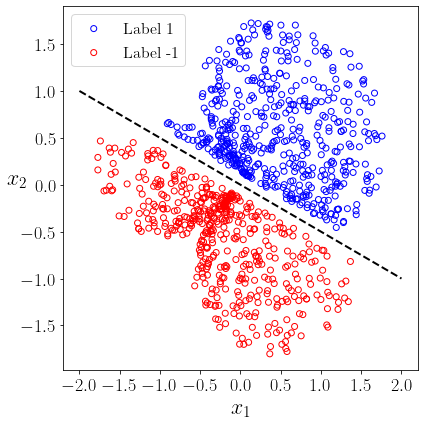

In [98]:
t = np.linspace(-2, 2)

plt.figure(figsize=(6, 6))
plt.scatter(x[:,0][y == 1], x[:,1][y == 1], facecolor="None", edgecolor='blue', label='Label 1')
plt.scatter(x[:,0][y == -1], x[:,1][y == -1], facecolor="None", edgecolor='red', label='Label -1')
plt.plot(t, -0.5*t, lw=2, ls='--', color="black")

plt.legend(loc='best', fontsize=16)


plt.xlabel('$x_1$', fontsize=22)
plt.ylabel('$x_2$', fontsize=22, rotation=0)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
#plt.savefig('separable_data.pdf', dpi=300)
plt.show()

In [109]:
data_read = np.loadtxt('data_HW1.csv', delimiter=',')

In [103]:
p1 = Perceptron(learning_rate=1)

w = p1.fit(x, y)

In [104]:
NoC = []
order = np.arange(1000)

for i  in range(1000):
    np.random.shuffle(order)
    p = Perceptron(learning_rate=1)
    p.fit(x[order,:], y[order])
    NoC.append(p._updates)    

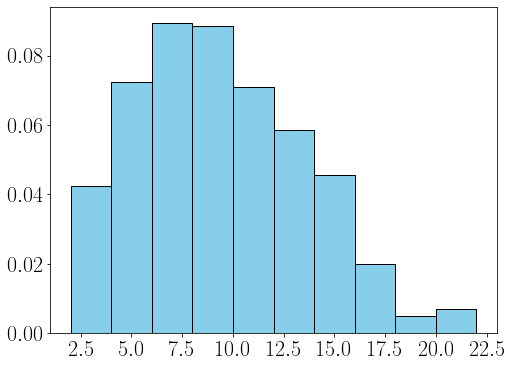

In [111]:
plt.figure(figsize=(8, 6))

plt.hist(NoC, bins=10, density=True, edgecolor='black', color='skyblue')

plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.show()

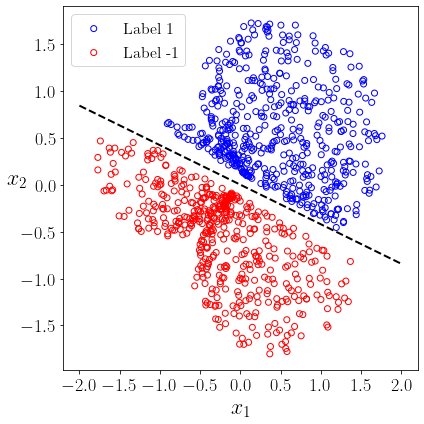

14


In [106]:
t = np.linspace(-2, 2)

plt.figure(figsize=(6, 6))
plt.scatter(x[:,0][y == 1], x[:,1][y == 1], facecolor="None", edgecolor='blue', label='Label 1')
plt.scatter(x[:,0][y == -1], x[:,1][y == -1], facecolor="None", edgecolor='red', label='Label -1')
plt.plot(t, -w[0]/w[2] - t*w[1]/w[2], lw=2, ls='--', color="black")

plt.legend(loc='best', fontsize=16)


plt.xlabel('$x_1$', fontsize=22)
plt.ylabel('$x_2$', fontsize=22, rotation=0)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()

print(p1._updates)